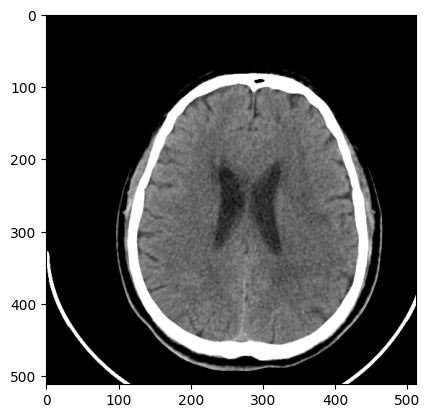

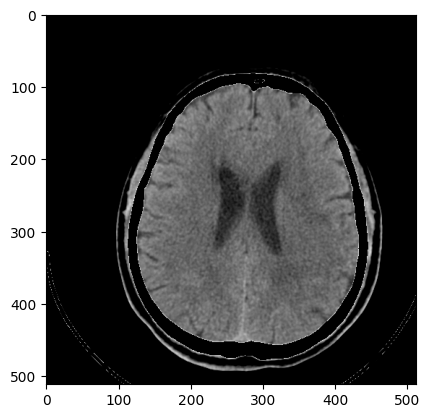

<Figure size 640x480 with 0 Axes>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Load the image
img = cv2.imread('/content/drive/MyDrive/sampleischemicdata/train/0091625/Scan/026.png')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# Apply threshold
ret, thresh = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY_INV)

# Bitwise AND with original image to remove parts with pixel values greater than 250
result = cv2.bitwise_and(img, img, mask=thresh)
plt.imshow(img)
plt.show()
# Save the resulting image
plt.imshow(result)
plt.show()
plt.savefig('/content/drive/MyDrive/sampleischemicdata/train/0091625/result.png')

<ipython-input-28-09a4b7872e4b>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  kernel = np.ones((5,5), np.float)


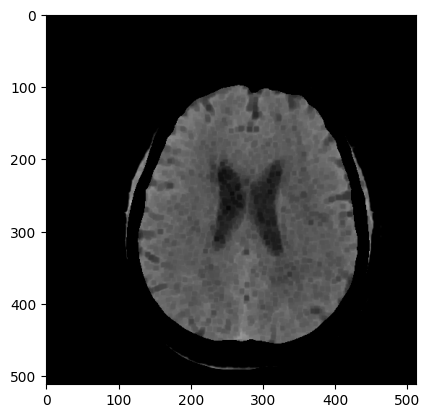

In [28]:

# Define the structuring element for erosion
kernel = np.ones((5,5), np.uint8)

# Apply erosion to remove boundaries
eroded_img = cv2.erode(result, kernel, iterations=1)
plt.imshow(eroded_img,'gray')
plt.show()

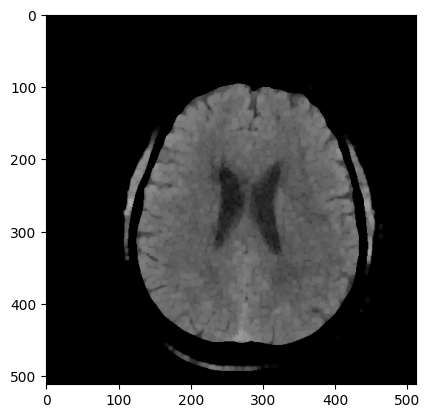

In [5]:
# Define the structuring element for dilation
kernel = np.ones((5,5), np.uint8)

# Apply dilation to remove boundaries
dilated_img = cv2.dilate(eroded_img, kernel, iterations=1)
plt.imshow(dilated_img,'gray')
plt.show()

brain skull removal for multilple image 

In [8]:
import os
pth='/content/drive/MyDrive/sampleischemicdata/train'
patient_fldr=os.listdir(pth)


In [17]:
for i in patient_fldr:
    # print each patient folder name 
    directory2= i
    parent_dir = '/content/drive/MyDrive/sampleischemicdata/diated'

# New Path 
    path = os.path.join(parent_dir, directory2)
    os.makedirs(path)

    print("Directory '% s' created" % directory2) 
    #path1 = os.path.join(parent_dir, directory1) 

Directory '0538992' created
Directory '0538975' created
Directory '0539025' created
Directory '0539004' created
Directory '0539043' created
Directory '0539021' created
Directory '0538971' created
Directory '0539001' created
Directory '0538983' created
Directory '0539035' created
Directory '0538928' created
Directory '0538948' created
Directory '0538835' created
Directory '0538911' created
Directory '0538963' created
Directory '0538919' created
Directory '0538833' created
Directory '0538895' created
Directory '0538942' created
Directory '0538941' created
Directory '0538750' created
Directory '0538811' created
Directory '0538792' created
Directory '0538805' created
Directory '0538780' created
Directory '0538763' created
Directory '0538762' created
Directory '0538799' created
Directory '0538774' created
Directory '0538779' created
Directory '0538705' created
Directory '0538682' created
Directory '0538735' created
Directory '0538706' created
Directory '0538749' created
Directory '0538652' 

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, segmentation, color, morphology
import glob

filenames = glob.glob("/content/drive/MyDrive/sampleischemicdata/train/*/Scan/*.png")
filenames.sort()
# images = [cv2.imread(img) for img in filenames]

for fn in filenames:
  
  img = cv2.imread(fn)
  
  # Remove parts of the image with pixel values greater than 250
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  ret, thresh = cv2.threshold(gray, 250, 255, cv2.THRESH_TOZERO_INV)
  img_thresh = cv2.bitwise_and(img, img, mask=thresh)

  # Define the structuring element for erosion
  kernel = np.ones((5,5), np.uint8)

  # Apply erosion to remove boundaries
  eroded_img = cv2.erode(img_thresh, kernel, iterations=1)


  # Define the structuring element for dilation
  kernel = np.ones((5,5), np.uint8)

  # Apply dilation to remove boundaries
  dilated_img = cv2.dilate(eroded_img, kernel, iterations=1)
  # print( os.path.join("/content/drive/MyDrive/sampleischemicdata/newdata", fn.split('/')[-3]+fn.split('/')[-1] ))
  cv2.imwrite (
      os.path.join("/content/drive/MyDrive/sampleischemicdata/dilated", fn.split('/')[-3]+'/'+fn.split('/')[-1] ), 
      dilated_img)